<a href="https://colab.research.google.com/github/YiyunLei/NLP-Final-Project/blob/main/Draft_for_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json

In [ ]:
# Load simplify data
dataset_dir = "./dataset/simplify_json"
json_files = [dataset_dir + "/train_split.json", dataset_dir + "/valid_split.json"]
data_files = []
for json_file in json_files:
    with open(json_file, 'r') as f:
        data_files.append(json.load(f))
              
data_files[0][0]

{'Openness': 'low',
 'Conscientiousness': 'high',
 'Extraversion': 'high',
 'Agreeableness': 'low',
 'Neuroticism': 'high',
 'Speaker': '童文洁',
 'Utterance': '真巧'}

In [ ]:

# covert big-5 ['Openness', 'Conscientiousness', 'Extraversion','Agreeableness', 'Neuroticism'] to 0:low 1:high
for i in range(len(data_files)):
    for j in range(len(data_files[i])):
        data_files[i][j]['label'] = [0 if data_files[i][j]['Openness'] == 'low' else 1,
                                     0 if data_files[i][j]['Conscientiousness'] == 'low' else 1,
                                     0 if data_files[i][j]['Extraversion'] == 'low' else 1,
                                     0 if data_files[i][j]['Agreeableness'] == 'low' else 1,
                                     0 if data_files[i][j]['Neuroticism'] == 'low' else 1]
data_files[1][0]

{'Openness': 'low',
 'Conscientiousness': 'high',
 'Extraversion': 'high',
 'Agreeableness': 'high',
 'Neuroticism': 'high',
 'Speaker': '于春晓',
 'Utterance': '怎么了',
 'label': [0, 1, 1, 1, 1]}

In [ ]:
# Get (X_train y_train), (X_valid, y_valid) from json file

X_train = []   # name, Utterance
y_train = []   # big-5
X_valid = []    # name, Utterance
y_valid = []    # big-5
speakers_train, speakers_valid = [],[]
for i in range(len(data_files[0])):
    X_train.append((data_files[0][i]['Speaker'], data_files[0][i]['Utterance']))
    y_train.append(data_files[0][i]['label'])
    speakers_train.append(data_files[0][i]['Speaker'])
speakers_train = list(set(speakers_train))
print("There are {} speakers in train_data" .format(len(speakers_train)))

for i in range(len(data_files[1])):
    X_valid.append((data_files[1][i]['Speaker'], data_files[1][i]['Utterance']))
    y_valid.append(data_files[1][i]['label'])
    speakers_valid.append(data_files[1][i]['Speaker'])
speakers_valid = list(set(speakers_valid))
print("There are {} speakers in valid_data" .format(len(speakers_valid)))

X_train[0]

There are 220 speakers in train_data
There are 33 speakers in valid_data


('童文洁', '真巧')

In [ ]:
y_train[0]

[0, 1, 1, 0, 1]

In [ ]:
def combine_same_speaker_data(speakers, X, y):
    # combine same speaker data to one data and only keep different Utterance and one speaker name
    X_combine = []
    y_combine = []
    for speaker in speakers:
        X_combine.append({speaker:[]})
        y_combine.append({speaker:[]})



    for i in range(len(X)):
        for j in range(len(X_combine)):
            if X[i][0] in X_combine[j]:
                X_combine[j][X[i][0]].append(X[i][1])
                y_combine[j][X[i][0]].append(y[i])


    for i in range(len(y_combine)):
        for key in y_combine[i]:
            y_combine[i][key] = y_combine[i][key][0]
    return X_combine, y_combine

In [ ]:
X_train_combined, y_train_combined = combine_same_speaker_data(speakers_train, X_train, y_train)
X_valid_combined, y_valid_combined = combine_same_speaker_data(speakers_valid, X_valid, y_valid)

In [ ]:
len(y_valid_combined)

33

In [ ]:
y_train_combined

[{'陈可妈妈': [0, 1, 0, 1, 0]},
 {'罗素': [1, 1, 1, 1, 0]},
 {'陆长山': [0, 1, 0, 0, 0]},
 {'马邦尼': [0, 1, 1, 1, 1]},
 {'于小强': [0, 1, 0, 1, 0]},
 {'宋光明': [0, 1, 0, 1, 0]},
 {'姗姗': [0, 1, 1, 1, 0]},
 {'顾映真': [1, 1, 1, 1, 0]},
 {'艾小天': [1, 0, 1, 1, 1]},
 {'成晓峰': [0, 1, 0, 1, 0]},
 {'斯嘉丽': [1, 1, 1, 0, 0]},
 {'何东': [0, 1, 1, 1, 0]},
 {'何西': [1, 1, 0, 1, 0]},
 {'程俊': [1, 1, 1, 1, 0]},
 {'蒂娜': [1, 0, 1, 1, 1]},
 {'陈建': [0, 1, 0, 0, 0]},
 {'周格格': [0, 1, 1, 1, 1]},
 {'顾大鹏': [0, 0, 0, 1, 1]},
 {'袁则强': [0, 1, 0, 0, 0]},
 {'刘珍珍': [1, 1, 1, 1, 1]},
 {'方芳': [1, 0, 1, 1, 1]},
 {'封印': [1, 1, 1, 1, 0]},
 {'栗伟正': [0, 0, 1, 0, 1]},
 {'梁晓慧': [1, 1, 1, 1, 0]},
 {'张超': [0, 1, 0, 1, 0]},
 {'方圆': [1, 1, 1, 1, 0]},
 {'季杨杨': [0, 0, 0, 1, 1]},
 {'贾小朵': [1, 1, 1, 1, 0]},
 {'麦飞': [0, 1, 1, 1, 1]},
 {'毕然': [0, 0, 1, 1, 0]},
 {'刘炎': [1, 1, 1, 1, 0]},
 {'孙雅娴': [1, 1, 1, 1, 1]},
 {'陆晓婷': [0, 1, 0, 1, 1]},
 {'金志明': [0, 0, 1, 0, 1]},
 {'卢家凯': [0, 1, 0, 1, 1]},
 {'周芳': [0, 0, 0, 0, 1]},
 {'罗玥': [1, 1, 1, 0, 0]},
 {'魏渭': [1, 1, 1

In [ ]:
# encoding=utf-8
import jieba
seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + " ".join(seg_list))  # Accruate Mode

Default Mode: 我 来到 北京 清华大学


In [ ]:
for speaker in X_train_combined:
    for key in speaker:
        for i in range(len(speaker[key])):
            seg_list = jieba.cut(speaker[key][i], cut_all=False)
            speaker[key][i] = " ".join(seg_list)

In [ ]:
X_train_combined

In [ ]:
for speaker in X_train_combined:
    for key in speaker:
        for i in range(1, len(speaker[key])):
            # combine all key's value to one value usse space to split
            speaker[key][0] = speaker[key][0] + " " + speaker[key][i]

In [ ]:
X_train_combined

[{'陈可妈妈': ['上门 好 了 太好了 正好 回去 书法 比赛 耽误 不了 走 之前 能 见到 他 吗 太 遗憾 了 妈来 一趟 也 不 容易 也 没 发挥 出 作用 来 我 跟 你 说   男人 就 喜欢 胖 的',
   '太好了',
   '正好 回去 书法 比赛 耽误 不了',
   '走 之前 能 见到 他 吗',
   '太 遗憾 了',
   '妈来 一趟 也 不 容易',
   '也 没 发挥 出 作用 来',
   '我 跟 你 说   男人 就 喜欢 胖 的']},
 {'罗素': ['这 叫 什么 事 人家 还 道 上 歉 了 说 自己 当时 太 冲动 了 然后 后来 给 我 妈 打电话 我妈 没接 这 小题大做 了 吧 娇 就 娇点 女孩 就 得 教惯 着 带 我 检讨   我错 了 行 了 吧 我 知道 你 早就 想 把 茜 茜 弄 回家 自己 带 可是 老婆 你 好好 想想 您 是 一 女强人 公司 那么 多事 那么 多人 等 着 您 的 英明 决策 呢 您 哪 有 时间 带 孩子 啊 老婆 行 了 别 较劲 了 我 今天 游戏机 都 没 碰 一下 早就 洗完 澡 了 一直 等 着 你 呢 你 这 没事 你 跟 电脑 起 什么 腻 呀 你 你 确实 挺 自私 的 咱 原来 不是 说 好了吗 让 孩子 有 一个 快乐 健康 的 童年 所有 的 风雨 都 咱俩 扛 呸 呸 呸 就算 有 那 一天   那茜茜 也 有 自己 的 老公 老婆 从 咱俩 结婚 到 现在 你 终于 说 了 一句 真心话 落 了 哪 么 远 了 那 她 天天 看 动画片 那 她 天 看 动画片   她 可不 就是 跟 里头 学嘛 等 她 到 了 不 看 动画片 的 年纪 她 自然 地 说话 就 正常 了 老婆   在 我 回答 你 之前 你 能 不能 告诉 我 你 今天 见到 张潮 什么 心情 那些 家长 不是 好像 跟 疯 了 一样 是 已经 疯 了 老婆   是   我妈 带茜茜 是 养成 一些 不好 的 习惯 但是 能 改 呀 咱俩 想 带茜茜 咱俩 有 时间 吗 有 精力 吗 茜茜 在 我 妈 那 起码 吃 得 好   睡得 香 这 一切 都 挺 好 的 你 你 这 孩子 哭 成 这样 了 没动静 了 呢 你 看看 老婆   你 太 厉害 了 我 太 崇拜

In [ ]:
for speaker in X_train_combined:
    for key in speaker:
        for i in reversed(range(1, len(speaker[key]))):
            # delete other key's value
            del speaker[key][i]

In [ ]:
X_train_combined

In [1]:
len(X_train_combined)

NameError: ignored

In [ ]:
# clean data again
import re
for speaker in X_train_combined:
    for key in speaker:
        # Remove non-alphanumeric characters (except underscores) and convert to lowercase
        speaker[key][0] = re.sub(r'[^\w\s_]', '', speaker[key][0])
        # Replace multiple whitespace characters with a single space
        speaker[key][0] = re.sub(r'\s+', ' ', speaker[key][0])

In [ ]:
X_train_combined[0]

In [ ]:
y_train_combined[0]

{'陈可妈妈': [0, 1, 0, 1, 0]}

In [ ]:
X_train = []
y_train = []
for speaker in X_train_combined:
    for key in speaker:
        X_train.append(speaker[key][0])
for speaker in y_train_combined:
    for key in speaker:
        y_train.append(speaker[key][0])
    
X_train

['上门 好 了 太好了 正好 回去 书法 比赛 耽误 不了 走 之前 能 见到 他 吗 太 遗憾 了 妈来 一趟 也 不 容易 也 没 发挥 出 作用 来 我 跟 你 说 男人 就 喜欢 胖 的',
 '这 叫 什么 事 人家 还 道 上 歉 了 说 自己 当时 太 冲动 了 然后 后来 给 我 妈 打电话 我妈 没接 这 小题大做 了 吧 娇 就 娇点 女孩 就 得 教惯 着 带 我 检讨 我错 了 行 了 吧 我 知道 你 早就 想 把 茜 茜 弄 回家 自己 带 可是 老婆 你 好好 想想 您 是 一 女强人 公司 那么 多事 那么 多人 等 着 您 的 英明 决策 呢 您 哪 有 时间 带 孩子 啊 老婆 行 了 别 较劲 了 我 今天 游戏机 都 没 碰 一下 早就 洗完 澡 了 一直 等 着 你 呢 你 这 没事 你 跟 电脑 起 什么 腻 呀 你 你 确实 挺 自私 的 咱 原来 不是 说 好了吗 让 孩子 有 一个 快乐 健康 的 童年 所有 的 风雨 都 咱俩 扛 呸 呸 呸 就算 有 那 一天 那茜茜 也 有 自己 的 老公 老婆 从 咱俩 结婚 到 现在 你 终于 说 了 一句 真心话 落 了 哪 么 远 了 那 她 天天 看 动画片 那 她 天 看 动画片 她 可不 就是 跟 里头 学嘛 等 她 到 了 不 看 动画片 的 年纪 她 自然 地 说话 就 正常 了 老婆 在 我 回答 你 之前 你 能 不能 告诉 我 你 今天 见到 张潮 什么 心情 那些 家长 不是 好像 跟 疯 了 一样 是 已经 疯 了 老婆 是 我妈 带茜茜 是 养成 一些 不好 的 习惯 但是 能 改 呀 咱俩 想 带茜茜 咱俩 有 时间 吗 有 精力 吗 茜茜 在 我 妈 那 起码 吃 得 好 睡得 香 这 一切 都 挺 好 的 你 你 这 孩子 哭 成 这样 了 没动静 了 呢 你 看看 老婆 你 太 厉害 了 我 太 崇拜 你 了 老婆 你 能 不能 别 把 你 带 手下 喊 口号 那 一套 用 在 咱 闺女 身上 啊 她 怎么 不 正常 了 才 5 岁 的 孩子 该会 的 都 会 了 那 我 应该 怎么 说 我 的 天呐 耽误 什么 了 我 爸妈 给 她 养得 多 好 啊 长 那么 高 的 个 健健康康 的 差 哪 了 呀 瞧 你 说 的 咱 闺女 像 白痴

In [ ]:
len(y_train)

# get X_train and y_train

220

In [ ]:
import codecs

def load_stopwords(filename):
    stopwords = []
    with codecs.open(filename, 'r', encoding='utf-8', errors='ignore') as fp:
        stopwords = fp.read().split('\n')
    return set(stopwords)

In [ ]:
stopwords_file     = "./stopwords-master/cn_stopwords.txt"
stop_words = load_stopwords(stopwords_file)

In [ ]:
stop_words

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=stop_words)
X_features_train = vectorizer.fit_transform(X_train)

/Users/yiyunlei/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['若果'] not in stop_words.
  warnings.warn(


In [ ]:
# Create a logistic regression classifier trained on the featurized training data
# print("X_features_train:", X_features_train[0])
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='liblinear')
lr_classifier.fit(X_features_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
words_df = pd.DataFrame(matrix.toarray(),
                        columns=vectorizer.get_feature_names())
words_df

/Users/yiyunlei/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00  001  007  04  05  06  07  08  09  10  ...  龙井  龙凤胎  龙柯来  龙潭虎穴  龙王庙  \
0     0    0    0   0   0   0   0   0   0   0  ...   0    0    0     0    0   
1     1    0    0   0   0   0   0   0   0   0  ...   0    0    0     0    0   
2     0    0    0   0   0   0   0   0   0   0  ...   0    0    0     0    0   
3     0    0    0   0   0   0   0   0   0   0  ...   0    0    0     0    0   
4     0    0    1   0   0   0   0   0   0   2  ...   0    0    0     0    0   
..   ..  ...  ...  ..  ..  ..  ..  ..  ..  ..  ...  ..  ...  ...   ...  ...   
215   0    0    0   0   0   0   0   0   0   0  ...   0    0    0     0    0   
216   0    0    0   0   1   0   0   0   0   7  ...   0    0    0     0    0   
217   0    0    0   0   0   0   0   0   0   0  ...   0    0    0     0    0   
218   0    0    0   0   0   0   0   0   0   0  ...   0    0    0     0    0   
219   0    0    0   0   0   0   0   0   0   0  ...   0    0    0     0    0   

     龙舌兰  龙虾  龙门  龙颜大悦  龟派  
0      0   0   0     0   0  
1      0   0   0     0   0  
2      0   0   0     0   0  
3      0   0   0     0   0  
4      0   0   0     0   0  
..   ...  ..  ..   ...  ..  
215    0   0   0     0   0  
216    0   0   1     1   0  
217    0   0   0     0   0  
218    0   0   0     0   0  
219    0   0   0     0   0  

[220 rows x 26046 columns]

In [ ]:
def most_informative_features(vectorizer, classifier, n=20):
    # Adapted from https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers#11116960
    feature_names       = vectorizer.get_feature_names_out()
    coefs_with_features = sorted(zip(classifier.coef_[0], feature_names))
    top                 = zip(coefs_with_features[:n], coefs_with_features[:-(n + 1):-1])
    for (coef_1, feature_1), (coef_2, feature_2) in top:
        print("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, feature_1, coef_2, feature_2))

In [ ]:
# Show which features have the highest-value logistic regression coefficients
print("Most informative features")
most_informative_features(vectorizer, lr_classifier, 10)

Most informative features
	-0.2807	一起             		0.2723	问题             
	-0.2692	起诉             		0.2405	尊重             
	-0.2672	不了             		0.2401	每天             
	-0.2647	摩托车            		0.2305	手机             
	-0.2607	总裁             		0.2234	不能             
	-0.2558	记不住            		0.2125	这人             
	-0.2527	学生             		0.1912	真的             
	-0.2491	张盛             		0.1882	看来             
	-0.2457	房子             		0.1877	喜欢             
	-0.2252	回去             		0.1855	开心             


In [ ]:
y_valid_combined

[{'安娜': [0, 1, 1, 1, 1]},
 {'唐鹏母亲': [0, 1, 0, 0, 1]},
 {'袁大头': [1, 0, 1, 1, 0]},
 {'胡七星': [1, 1, 1, 1, 0]},
 {'果长山': [1, 0, 1, 1, 0]},
 {'司徒末': [1, 1, 1, 0, 1]},
 {'果然': [0, 1, 0, 1, 0]},
 {'王珊': [1, 1, 1, 1, 0]},
 {'那依': [0, 1, 1, 0, 0]},
 {'刘栋': [0, 0, 1, 1, 1]},
 {'莫正源': [0, 0, 1, 1, 0]},
 {'傅沛': [0, 0, 1, 1, 1]},
 {'唐鹏': [1, 1, 1, 1, 0]},
 {'于春晓': [0, 1, 1, 1, 1]},
 {'焦阳': [1, 1, 1, 1, 0]},
 {'王长水': [0, 1, 1, 1, 0]},
 {'孙总': [0, 0, 1, 0, 0]},
 {'杨桃': [0, 1, 1, 1, 1]},
 {'白洁': [0, 1, 1, 0, 1]},
 {'方骏': [0, 1, 1, 1, 0]},
 {'苏青': [0, 1, 0, 1, 0]},
 {'林君': [1, 1, 0, 0, 0]},
 {'段西风': [0, 1, 1, 1, 0]},
 {'苏珊': [1, 1, 1, 1, 0]},
 {'顾末易': [0, 1, 0, 0, 0]},
 {'彭凯旋': [0, 1, 1, 1, 0]},
 {'叶珊': [0, 1, 0, 0, 1]},
 {'莫小康': [1, 0, 0, 1, 1]},
 {'戴娜': [1, 1, 0, 0, 0]},
 {'冯兰芝': [0, 1, 1, 0, 1]},
 {'刘慧芸': [0, 1, 0, 1, 1]},
 {'薛素梅': [0, 1, 1, 0, 1]},
 {'方依依': [1, 0, 1, 1, 0]}]

In [ ]:
X_valid_combined

[{'安娜': ['是我 安娜',
   '没事吧你 这跟我怎么这么客气',
   '人家哪要我陪 人家早飞台湾了',
   '我说宝贝儿我已经跟这三个小魔鬼战斗一天了',
   '刚把他们哄睡了这给你打个电话',
   '咱能不能换个话题绕着点聊',
   '我问你 你不是说咱俩一块练瑜伽吗',
   '明天周末咱俩找那依去啊',
   '怎么了 ',
   'ok明天见',
   '你看这里头没有比我胖的了吧',
   '我都不好意思',
   '什么意思',
   '去 那就让他疲劳好了',
   '不行就让他审丑',
   '这样境界更高',
   '得了吧',
   '你昨天突然说那依来不了了',
   '怎么了',
   '他怎么不要 干嘛做了呀 那么大岁数多伤身',
   '去 去',
   '生',
   '而且是越快越好',
   '马上生',
   '你们家老唐就算他再稳重',
   '他不招别人',
   '架不住别人招他',
   '这种事我见多了',
   '我们家老夏身边全是这号人',
   '就算他不那么爱你',
   '可是有个孩子他多少他折腾不到哪去',
   '所以赶快给他生个孩子',
   '给他拴住',
   '那孩子怎么办',
   '当当他们怎么办',
   '你们不知道',
   '当当在我身后哭的时候',
   '我那个心我跟刀绞一样',
   '你们知道吗',
   '我这当妈的也真够缺德的',
   '我我怎么把孩子那么一扔我就走了',
   '当当恨我怎么办',
   '我能折腾出什么结果',
   '我太了解他了',
   '我那样只会让他更烦',
   '我他不可能改',
   '我不想他',
   '也不想我的未来会怎么样',
   '我整整5天没看见我的萌萌',
   '丁丁 和当当了',
   '我打生下他们到现在我从来没离开过他们这么长时间',
   '我太想他们了',
   '天一亮我就回去吧',
   '我想好了',
   '就算从此被夏宁波瞧不起我也认了',
   '我不能伤害到我的孩子',
   '我已经没有尊严了',
   '我只剩下他们了',
   '你知道吗']},
 {'唐鹏母亲': ['这一摸就是好东西',
   '真是 挺贵的吧',
   '我的妈一个枕头1200',
   '你可

In [ ]:
len(y_valid_combined)

33

In [ ]:
for speaker in X_valid_combined:
    for key in speaker:
        for i in range(len(speaker[key])):
            seg_list = jieba.cut(speaker[key][i], cut_all=False)
            speaker[key][i] = " ".join(seg_list)

In [ ]:
X_valid_combined

[{'安娜': ['是 我 安娜',
   '没事 吧 你   这 跟 我 怎么 这么 客气',
   '人家 哪要 我 陪   人家 早飞 台湾 了',
   '我 说 宝贝儿 我 已经 跟 这 三个 小 魔鬼 战斗 一天 了',
   '刚 把 他们 哄 睡 了 这 给 你 打个 电话',
   '咱能 不能 换个 话题 绕 着 点 聊',
   '我 问 你   你 不是 说 咱俩 一块 练 瑜伽 吗',
   '明天 周末 咱俩 找 那 依去 啊',
   '怎么 了  ',
   'ok 明天 见',
   '你 看 这里 头 没有 比 我 胖 的 了 吧',
   '我 都 不好意思',
   '什么 意思',
   '去   那 就让 他 疲劳 好 了',
   '不行 就让 他 审丑',
   '这样 境界 更高',
   '得了吧',
   '你 昨天 突然 说 那 依来 不了 了',
   '怎么 了',
   '他 怎么 不要   干嘛 做 了 呀   那么 大 岁数 多 伤身',
   '去   去',
   '生',
   '而且 是 越快越好',
   '马上 生',
   '你们 家老唐 就算 他 再 稳重',
   '他 不招 别人',
   '架不住 别人 招 他',
   '这种 事 我 见 多 了',
   '我们 家 老夏 身边 全是 这 号 人',
   '就算 他 不 那么 爱 你',
   '可是 有个 孩子 他 多少 他 折腾 不 到哪去',
   '所以 赶快 给 他 生个 孩子',
   '给 他 拴住',
   '那 孩子 怎么办',
   '当当 他们 怎么办',
   '你们 不 知道',
   '当当 在 我 身后 哭 的 时候',
   '我 那个 心 我 跟 刀 绞 一样',
   '你们 知道 吗',
   '我 这 当妈 的 也 真够 缺德 的',
   '我 我 怎么 把 孩子 那么 一 扔 我 就 走 了',
   '当当 恨 我 怎么办',
   '我能 折腾 出 什么 结果',
   '我 太 了解 他 了',
   '我 那样 只会 让 他 更烦',
   '我 他 不 可能 改',
   '我 不想 他',
   '也 不想 我 的 未来 会 怎么样',
   '我 整整 5 天 没 看

In [ ]:
import re
for speaker in X_valid_combined:
    for key in speaker:
        # Remove non-alphanumeric characters (except underscores) and convert to lowercase
        speaker[key][0] = re.sub(r'[^\w\s_]', '', speaker[key][0])
        # Replace multiple whitespace characters with a single space
        speaker[key][0] = re.sub(r'\s+', ' ', speaker[key][0])

In [ ]:
X_valid_combined

[{'安娜': ['是 我 安娜',
   '没事 吧 你   这 跟 我 怎么 这么 客气',
   '人家 哪要 我 陪   人家 早飞 台湾 了',
   '我 说 宝贝儿 我 已经 跟 这 三个 小 魔鬼 战斗 一天 了',
   '刚 把 他们 哄 睡 了 这 给 你 打个 电话',
   '咱能 不能 换个 话题 绕 着 点 聊',
   '我 问 你   你 不是 说 咱俩 一块 练 瑜伽 吗',
   '明天 周末 咱俩 找 那 依去 啊',
   '怎么 了  ',
   'ok 明天 见',
   '你 看 这里 头 没有 比 我 胖 的 了 吧',
   '我 都 不好意思',
   '什么 意思',
   '去   那 就让 他 疲劳 好 了',
   '不行 就让 他 审丑',
   '这样 境界 更高',
   '得了吧',
   '你 昨天 突然 说 那 依来 不了 了',
   '怎么 了',
   '他 怎么 不要   干嘛 做 了 呀   那么 大 岁数 多 伤身',
   '去   去',
   '生',
   '而且 是 越快越好',
   '马上 生',
   '你们 家老唐 就算 他 再 稳重',
   '他 不招 别人',
   '架不住 别人 招 他',
   '这种 事 我 见 多 了',
   '我们 家 老夏 身边 全是 这 号 人',
   '就算 他 不 那么 爱 你',
   '可是 有个 孩子 他 多少 他 折腾 不 到哪去',
   '所以 赶快 给 他 生个 孩子',
   '给 他 拴住',
   '那 孩子 怎么办',
   '当当 他们 怎么办',
   '你们 不 知道',
   '当当 在 我 身后 哭 的 时候',
   '我 那个 心 我 跟 刀 绞 一样',
   '你们 知道 吗',
   '我 这 当妈 的 也 真够 缺德 的',
   '我 我 怎么 把 孩子 那么 一 扔 我 就 走 了',
   '当当 恨 我 怎么办',
   '我能 折腾 出 什么 结果',
   '我 太 了解 他 了',
   '我 那样 只会 让 他 更烦',
   '我 他 不 可能 改',
   '我 不想 他',
   '也 不想 我 的 未来 会 怎么样',
   '我 整整 5 天 没 看

In [ ]:
for speaker in X_valid_combined:
    for key in speaker:
        for i in range(1, len(speaker[key])):
            # combine all key's value to one value usse space to split
            speaker[key][0] = speaker[key][0] + " " + speaker[key][i]

In [ ]:
X_valid_combined

[{'安娜': ['是 我 安娜 没事 吧 你   这 跟 我 怎么 这么 客气 人家 哪要 我 陪   人家 早飞 台湾 了 我 说 宝贝儿 我 已经 跟 这 三个 小 魔鬼 战斗 一天 了 刚 把 他们 哄 睡 了 这 给 你 打个 电话 咱能 不能 换个 话题 绕 着 点 聊 我 问 你   你 不是 说 咱俩 一块 练 瑜伽 吗 明天 周末 咱俩 找 那 依去 啊 怎么 了   ok 明天 见 你 看 这里 头 没有 比 我 胖 的 了 吧 我 都 不好意思 什么 意思 去   那 就让 他 疲劳 好 了 不行 就让 他 审丑 这样 境界 更高 得了吧 你 昨天 突然 说 那 依来 不了 了 怎么 了 他 怎么 不要   干嘛 做 了 呀   那么 大 岁数 多 伤身 去   去 生 而且 是 越快越好 马上 生 你们 家老唐 就算 他 再 稳重 他 不招 别人 架不住 别人 招 他 这种 事 我 见 多 了 我们 家 老夏 身边 全是 这 号 人 就算 他 不 那么 爱 你 可是 有个 孩子 他 多少 他 折腾 不 到哪去 所以 赶快 给 他 生个 孩子 给 他 拴住 那 孩子 怎么办 当当 他们 怎么办 你们 不 知道 当当 在 我 身后 哭 的 时候 我 那个 心 我 跟 刀 绞 一样 你们 知道 吗 我 这 当妈 的 也 真够 缺德 的 我 我 怎么 把 孩子 那么 一 扔 我 就 走 了 当当 恨 我 怎么办 我能 折腾 出 什么 结果 我 太 了解 他 了 我 那样 只会 让 他 更烦 我 他 不 可能 改 我 不想 他 也 不想 我 的 未来 会 怎么样 我 整整 5 天 没 看见 我 的 萌萌 丁丁   和 当当 了 我 打生 下 他们 到 现在 我 从来 没 离开 过 他们 这么 长时间 我太想 他们 了 天一亮 我 就 回去 吧 我 想 好 了 就算 从此 被 夏 宁波 瞧不起 我 也 认 了 我 不能 伤害 到 我 的 孩子 我 已经 没有 尊严 了 我 只 剩下 他们 了 你 知道 吗',
   '没事 吧 你   这 跟 我 怎么 这么 客气',
   '人家 哪要 我 陪   人家 早飞 台湾 了',
   '我 说 宝贝儿 我 已经 跟 这 三个 小 魔鬼 战斗 一天 了',
   '刚 把 他们 哄 睡 了 这 给 你 打个 

In [ ]:
for speaker in X_valid_combined:
    for key in speaker:
        for i in reversed(range(1, len(speaker[key]))):
            # delete other key's value
            del speaker[key][i]

In [ ]:
X_valid_combined

[{'安娜': ['是 我 安娜 没事 吧 你 这 跟 我 怎么 这么 客气 人家 哪要 我 陪 人家 早飞 台湾 了 我 说 宝贝儿 我 已经 跟 这 三个 小 魔鬼 战斗 一天 了 刚 把 他们 哄 睡 了 这 给 你 打个 电话 咱能 不能 换个 话题 绕 着 点 聊 我 问 你 你 不是 说 咱俩 一块 练 瑜伽 吗 明天 周末 咱俩 找 那 依去 啊 怎么 了 ok 明天 见 你 看 这里 头 没有 比 我 胖 的 了 吧 我 都 不好意思 什么 意思 去 那 就让 他 疲劳 好 了 不行 就让 他 审丑 这样 境界 更高 得了吧 你 昨天 突然 说 那 依来 不了 了 怎么 了 他 怎么 不要 干嘛 做 了 呀 那么 大 岁数 多 伤身 去 去 生 而且 是 越快越好 马上 生 你们 家老唐 就算 他 再 稳重 他 不招 别人 架不住 别人 招 他 这种 事 我 见 多 了 我们 家 老夏 身边 全是 这 号 人 就算 他 不 那么 爱 你 可是 有个 孩子 他 多少 他 折腾 不 到哪去 所以 赶快 给 他 生个 孩子 给 他 拴住 那 孩子 怎么办 当当 他们 怎么办 你们 不 知道 当当 在 我 身后 哭 的 时候 我 那个 心 我 跟 刀 绞 一样 你们 知道 吗 我 这 当妈 的 也 真够 缺德 的 我 我 怎么 把 孩子 那么 一 扔 我 就 走 了 当当 恨 我 怎么办 我能 折腾 出 什么 结果 我 太 了解 他 了 我 那样 只会 让 他 更烦 我 他 不 可能 改 我 不想 他 也 不想 我 的 未来 会 怎么样 我 整整 5 天 没 看见 我 的 萌萌 丁丁 和 当当 了 我 打生 下 他们 到 现在 我 从来 没 离开 过 他们 这么 长时间 我太想 他们 了 天一亮 我 就 回去 吧 我 想 好 了 就算 从此 被 夏 宁波 瞧不起 我 也 认 了 我 不能 伤害 到 我 的 孩子 我 已经 没有 尊严 了 我 只 剩下 他们 了 你 知道 吗']},
 {'唐鹏母亲': ['这一摸 就是 好 东西 真是 挺贵 的 吧 我 的 妈 一个 枕头 1200 你 可 真 舍得 给 妈 花钱 了 哪 君 真 好 以后 可 别 这么 大手大脚 的 你 看 你们 还 得 供 这 房子 妈 枕 什么 都行 行 你 累 一天 了 歇 着 我 去

In [ ]:
import re
for speaker in X_valid_combined:
    for key in speaker:
        # Remove non-alphanumeric characters (except underscores) and convert to lowercase
        speaker[key][0] = re.sub(r'[^\w\s_]', '', speaker[key][0])
        # Replace multiple whitespace characters with a single space
        speaker[key][0] = re.sub(r'\s+', ' ', speaker[key][0])

In [ ]:
X_valid = []
y_valid = []
for speaker in X_valid_combined:
    for key in speaker:
        X_valid.append(speaker[key][0])
for speaker in y_valid_combined:
    for key in speaker:
        y_valid.append(speaker[key][0])
    
X_valid

['是 我 安娜 没事 吧 你 这 跟 我 怎么 这么 客气 人家 哪要 我 陪 人家 早飞 台湾 了 我 说 宝贝儿 我 已经 跟 这 三个 小 魔鬼 战斗 一天 了 刚 把 他们 哄 睡 了 这 给 你 打个 电话 咱能 不能 换个 话题 绕 着 点 聊 我 问 你 你 不是 说 咱俩 一块 练 瑜伽 吗 明天 周末 咱俩 找 那 依去 啊 怎么 了 ok 明天 见 你 看 这里 头 没有 比 我 胖 的 了 吧 我 都 不好意思 什么 意思 去 那 就让 他 疲劳 好 了 不行 就让 他 审丑 这样 境界 更高 得了吧 你 昨天 突然 说 那 依来 不了 了 怎么 了 他 怎么 不要 干嘛 做 了 呀 那么 大 岁数 多 伤身 去 去 生 而且 是 越快越好 马上 生 你们 家老唐 就算 他 再 稳重 他 不招 别人 架不住 别人 招 他 这种 事 我 见 多 了 我们 家 老夏 身边 全是 这 号 人 就算 他 不 那么 爱 你 可是 有个 孩子 他 多少 他 折腾 不 到哪去 所以 赶快 给 他 生个 孩子 给 他 拴住 那 孩子 怎么办 当当 他们 怎么办 你们 不 知道 当当 在 我 身后 哭 的 时候 我 那个 心 我 跟 刀 绞 一样 你们 知道 吗 我 这 当妈 的 也 真够 缺德 的 我 我 怎么 把 孩子 那么 一 扔 我 就 走 了 当当 恨 我 怎么办 我能 折腾 出 什么 结果 我 太 了解 他 了 我 那样 只会 让 他 更烦 我 他 不 可能 改 我 不想 他 也 不想 我 的 未来 会 怎么样 我 整整 5 天 没 看见 我 的 萌萌 丁丁 和 当当 了 我 打生 下 他们 到 现在 我 从来 没 离开 过 他们 这么 长时间 我太想 他们 了 天一亮 我 就 回去 吧 我 想 好 了 就算 从此 被 夏 宁波 瞧不起 我 也 认 了 我 不能 伤害 到 我 的 孩子 我 已经 没有 尊严 了 我 只 剩下 他们 了 你 知道 吗',
 '这一摸 就是 好 东西 真是 挺贵 的 吧 我 的 妈 一个 枕头 1200 你 可 真 舍得 给 妈 花钱 了 哪 君 真 好 以后 可 别 这么 大手大脚 的 你 看 你们 还 得 供 这 房子 妈 枕 什么 都行 行 你 累 一天 了 歇 着 我 去 做饭 去 你 想 吃 什么 妈 给 你

In [ ]:
y_valid

[0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1]

In [ ]:
X_valid_features =  vectorizer.transform(X_valid)

Classifying test data
Accuracy  = 0.45454545454545453
Precision for label 0 = 0.3333333333333333
Recall    for label 0 = 0.6363636363636364
Precision for label 1 = 0.6666666666666666
Recall    for label 1 = 0.36363636363636365
Generating plots


/Users/yiyunlei/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/yiyunlei/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


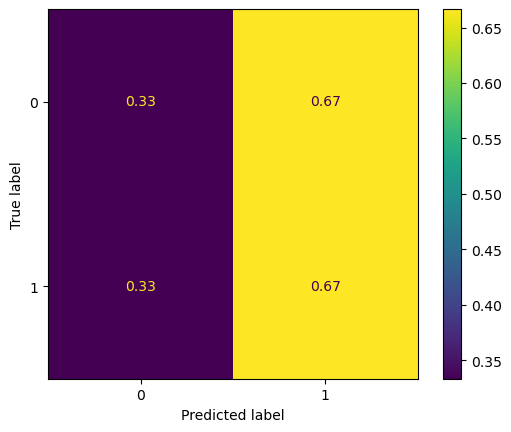

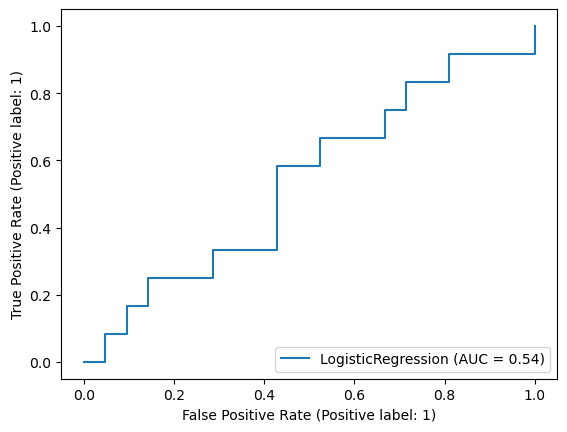

In [ ]:
# Classify the test data and see how well you perform
# For various evaluation scores see https://scikit-learn.org/stable/modules/model_evaluation.html
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

print("Classifying test data")
predicted_labels = lr_classifier.predict(X_valid_features)
print('Accuracy  = {}'.format(metrics.accuracy_score(predicted_labels,  y_valid)))
for label in [0, 1]:
    print('Precision for label {} = {}'.format(label, metrics.precision_score(predicted_labels, y_valid, pos_label=label)))
    print('Recall    for label {} = {}'.format(label, metrics.recall_score(predicted_labels,    y_valid, pos_label=label)))


print("Generating plots")
metrics.plot_confusion_matrix(lr_classifier, X_valid_features, y_valid, normalize='true')
metrics.plot_roc_curve(lr_classifier, X_valid_features, y_valid)
plt.show()